In [ ]:
import numpy as np
import pandas as pd


In [ ]:

train_data = pd.read_csv("/content/train_set.csv")


In [ ]:
train_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725.0,12196.0,0.0,0.00,Calendar,16158.0
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058.0,74639.0,2820.0,12703.31,Fiscal,115784.0
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108.0,100554.0,0.0,12424.50,Calendar,144708.0
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369.0,140164.0,52754.0,13043.87,Fiscal,242323.0
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684.0,58813.0,0.0,7655.28,Calendar,82106.0


In [ ]:
for cols in train_data:
  print(train_data[cols].value_counts())

2014    10581
2013    10049
2015     9619
2016     4614
Name: Year, dtype: int64
2    11023
4     7653
1     6616
5     3227
3     3225
6     3096
7       23
Name: OGC, dtype: int64
Public Works, Transportation & Commerce     11030
Community Health                             7640
Public Protection                            6625
Culture & Recreation                         3217
Human Welfare & Neighborhood Development     3216
General Administration & Finance             3112
General City Responsibilities                  23
Name: OG, dtype: int64
DPH    7641
MTA    5170
DSS    2870
POL    2831
REC    1950
AIR    1636
FIR    1416
DPW    1346
ADM     882
SHF     869
LIB     827
PUC     776
WTR     696
CWP     480
CRT     464
HHP     340
CAT     279
ECD     272
DBI     265
HRD     255
JUV     253
FAM     247
CON     246
DAT     246
TIS     236
CPC     224
PRT     214
REG     207
TTX     206
ASR     175
PDR     142
ADP     130
ENV     117
BOS     110
ECN     101
RET      95
MYR      95
C

In [ ]:
for cols in train_data:
  print('################################')
  print(train_data[cols])
  print(train_data[cols].unique())

################################
0         2015
1         2013
2         2015
3         2016
4         2013
          ... 
287831    2016
287832    2015
287833    2014
287834    2013
287835    2015
Name: Year, Length: 287836, dtype: int64
[2015 2013 2016 2014]
################################
0         4
1         4
2         6
3         1
4         2
         ..
287831    3
287832    5
287833    2
287834    1
287835    4
Name: OGC, Length: 287836, dtype: int64
[4 6 1 2 3 5 7]
################################
0                                 Community Health
1                                 Community Health
2                 General Administration & Finance
3                                Public Protection
4          Public Works, Transportation & Commerce
                            ...                   
287831    Human Welfare & Neighborhood Development
287832                        Culture & Recreation
287833     Public Works, Transportation & Commerce
287834                    

In [ ]:
train_data.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

Year                  0
OGC                   0
OG                    0
DC                    0
Dept                  0
UC                    0
Union                 0
JF                    0
Job                   0
EI                    0
Salaries              0
Overtime              0
H/D                   0
YT                    0
Total_Compensation    0
dtype: int64

In [ ]:
train_data['Union'].unique()

array(['SEIU - Health Workers, Local 1021',
       'Stationary Engineers, Local 39',
       'Prof & Tech Engineers - Miscellaneous, Local 21',
       "Police Officers' Association", 'SEIU - Miscellaneous, Local 1021',
       'SEIU - Human Services, Local 1021',
       'Automotive Machinists, Local 1414',
       'Firefighters - Chiefs/Fire Boat Workers, Local 798',
       'Firefighters - Miscellaneous, Local 798',
       'Transportation Workers, Local 200',
       'Transport Workers - Transit Operators, Local 250-A',
       'Laborers, Local 261',
       'Prof & Tech Engineers - Court Attorneys, Local 21',
       "Deputy Sheriffs' Association",
       'SEIU - Staff and Per Diem Nurses, Local 1021',
       'Transport Workers - Auto Svc Workers, Local 250-A',
       'Municipal Executive Association - Miscellaneous',
       'Teamsters - Supervising Nurses, Local 856',
       'Electrical Workers, Local 6',
       'Prof & Tech Engineers - Personnel, Local 21',
       'Plumbers and Pipefitters

In [ ]:
for col in train_data.columns:
    print(col, ': ', len(train_data[col].unique()), ' labels')

Year :  4  labels
OGC :  7  labels
OG :  7  labels
DC :  54  labels
Dept :  54  labels
UC :  789  labels
Union :  72  labels
JF :  55  labels
Job :  1133  labels
EI :  52392  labels
Salaries :  104440  labels
Overtime :  33632  labels
H/D :  113664  labels
YT :  2  labels
Total_Compensation :  155957  labels


In [ ]:
train_data.OG.value_counts().to_dict()

{'Community Health': 62828,
 'Culture & Recreation': 26055,
 'General Administration & Finance': 25912,
 'General City Responsibilities': 293,
 'Human Welfare & Neighborhood Development': 26702,
 'Public Protection': 54769,
 'Public Works, Transportation & Commerce': 91239}

In [ ]:
df_frequency_map = train_data.OG.value_counts().to_dict()

In [ ]:
train_data.OG.head(10)

0                            Community Health
1                            Community Health
2            General Administration & Finance
3                           Public Protection
4     Public Works, Transportation & Commerce
5            General Administration & Finance
6    Human Welfare & Neighborhood Development
7     Public Works, Transportation & Commerce
8                        Culture & Recreation
9                           Public Protection
Name: OG, dtype: object

In [ ]:
df_frequency_map

{'Community Health': 62828,
 'Culture & Recreation': 26055,
 'General Administration & Finance': 25912,
 'General City Responsibilities': 293,
 'Human Welfare & Neighborhood Development': 26702,
 'Public Protection': 54769,
 'Public Works, Transportation & Commerce': 91239}

In [ ]:
train_data.OG.map(df_frequency_map)

0         62828
1         62828
2         25912
3         54769
4         91239
          ...  
287831    26702
287832    26055
287833    91239
287834    54769
287835    62828
Name: OG, Length: 287798, dtype: int64

In [ ]:
train_data.OG = train_data.OG.map(df_frequency_map)

In [ ]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,62828,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,62828,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,25912,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,54769,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,91239,HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,26702,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,26055,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,91239,HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,54769,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [ ]:
cols = ['DC','Dept','Union','JF','Job']

train_data.DC.value_counts().to_dict()
df_frequency_map = train_data.DC.value_counts().to_dict()
# train_data[cols].map(df_frequency_map)
train_data.DC = train_data.DC.map(df_frequency_map)
    

In [ ]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,62828,62834,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,62828,62834,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,25912,1293,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,54769,22896,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,91239,2897,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,26702,23839,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,26055,6598,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,91239,2897,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,54769,2363,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [ ]:
train_data.Dept.value_counts().to_dict()
df_frequency_map = train_data.Dept.value_counts().to_dict()
# train_data[cols].map(df_frequency_map)
train_data.Dept = train_data.Dept.map(df_frequency_map)
    

In [ ]:
train_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,62828,62834,62859,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,62828,62834,62859,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,25912,1293,1301,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,54769,22896,22911,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,91239,2897,2894,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [ ]:
train_data.Union.value_counts().to_dict()
df_frequency_map = train_data.Union.value_counts().to_dict()
# train_data[cols].map(df_frequency_map)
train_data.Union = train_data.Union.map(df_frequency_map)
    

In [ ]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,62828,62834,62859,250,16317,Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,62828,62834,62859,39,4602,Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,25912,1293,1301,21,36130,Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,54769,22896,22911,911,19177,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,91239,2897,2894,21,36130,Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,26702,23839,23847,535,12752,Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,26055,6598,6597,790,81349,Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,91239,2897,2894,6,6059,Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,54769,2363,2356,250,16317,Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [ ]:
train_data.JF.value_counts().to_dict()
df_frequency_map = train_data.JF.value_counts().to_dict()
# train_data[cols].map(df_frequency_map)
train_data.JF = train_data.JF.map(df_frequency_map)
    

In [ ]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,62828,62834,62859,250,16317,5777,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,62828,62834,62859,39,4602,17052,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,25912,1293,1301,21,36130,1357,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,54769,22896,22911,911,19177,19170,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,91239,2897,2894,21,36130,6423,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,26702,23839,23847,535,12752,14869,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,26055,6598,6597,790,81349,5380,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,91239,2897,2894,6,6059,17052,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,54769,2363,2356,250,16317,9370,Porter,29266,14425,0,4051.90,Calendar,19594


In [ ]:
train_data.Job.value_counts().to_dict()
df_frequency_map = train_data.Job.value_counts().to_dict()
# train_data[cols].map(df_frequency_map)
train_data.Job = train_data.Job.map(df_frequency_map)
    

In [ ]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,62828,62834,62859,250,16317,5777,37,6725,12196,0,0.00,Calendar,16158
1,2013,4,62828,62834,62859,39,4602,17052,1620,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,25912,1293,1301,21,36130,1357,88,46108,100554,0,12424.50,Calendar,144708
3,2016,1,54769,22896,22911,911,19177,19170,2753,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,91239,2897,2894,21,36130,6423,445,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,26702,23839,23847,535,12752,14869,3062,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,26055,6598,6597,790,81349,5380,1341,790,30704,0,5465.57,Calendar,40174
287833,2014,2,91239,2897,2894,6,6059,17052,1112,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,54769,2363,2356,250,16317,9370,2600,29266,14425,0,4051.90,Calendar,19594


In [ ]:
one_hot  =  pd.get_dummies(train_data.YT)

In [ ]:
df = pd.concat([train_data, one_hot], axis=1)

In [ ]:
df

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,Calendar,Fiscal
0,2015,4,62828,62834,62859,250,16317,5777,37,6725,12196,0,0.00,Calendar,16158,1,0
1,2013,4,62828,62834,62859,39,4602,17052,1620,25058,74639,2820,12703.31,Fiscal,115784,0,1
2,2015,6,25912,1293,1301,21,36130,1357,88,46108,100554,0,12424.50,Calendar,144708,1,0
3,2016,1,54769,22896,22911,911,19177,19170,2753,33369,140164,52754,13043.87,Fiscal,242323,0,1
4,2013,2,91239,2897,2894,21,36130,6423,445,28684,58813,0,7655.28,Calendar,82106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,26702,23839,23847,535,12752,14869,3062,9610,78980,30115,13068.80,Fiscal,147079,0,1
287832,2015,5,26055,6598,6597,790,81349,5380,1341,790,30704,0,5465.57,Calendar,40174,1,0
287833,2014,2,91239,2897,2894,6,6059,17052,1112,38352,104451,0,13054.94,Calendar,164669,1,0
287834,2013,1,54769,2363,2356,250,16317,9370,2600,29266,14425,0,4051.90,Calendar,19594,1,0


In [ ]:
f_train_data = df.drop('YT',axis=1)

In [ ]:
f_train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,Total_Compensation,Calendar,Fiscal
0,2015,4,62828,62834,62859,250,16317,5777,37,6725,12196,0,0.00,16158,1,0
1,2013,4,62828,62834,62859,39,4602,17052,1620,25058,74639,2820,12703.31,115784,0,1
2,2015,6,25912,1293,1301,21,36130,1357,88,46108,100554,0,12424.50,144708,1,0
3,2016,1,54769,22896,22911,911,19177,19170,2753,33369,140164,52754,13043.87,242323,0,1
4,2013,2,91239,2897,2894,21,36130,6423,445,28684,58813,0,7655.28,82106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,26702,23839,23847,535,12752,14869,3062,9610,78980,30115,13068.80,147079,0,1
287832,2015,5,26055,6598,6597,790,81349,5380,1341,790,30704,0,5465.57,40174,1,0
287833,2014,2,91239,2897,2894,6,6059,17052,1112,38352,104451,0,13054.94,164669,1,0
287834,2013,1,54769,2363,2356,250,16317,9370,2600,29266,14425,0,4051.90,19594,1,0


In [ ]:
f_train_data.corr()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,Total_Compensation,Calendar,Fiscal
Year,1.00,-0.01,0.00,0.00,0.00,-0.00,0.01,-0.01,0.00,0.00,0.00,0.02,-0.01,0.01,-0.30,0.30
OGC,-0.01,1.00,-0.58,0.13,0.13,-0.01,0.28,-0.04,-0.10,0.00,-0.22,-0.30,-0.23,-0.27,-0.00,0.00
OG,0.00,-0.58,1.00,0.26,0.26,-0.26,-0.16,0.15,0.20,0.00,0.11,0.11,0.16,0.14,0.00,-0.00
DC,0.00,0.13,0.26,1.00,1.00,0.03,-0.10,0.49,0.32,0.01,-0.04,-0.03,-0.05,-0.03,0.01,-0.01
Dept,0.00,0.13,0.26,1.00,1.00,0.03,-0.10,0.49,0.32,0.01,-0.04,-0.03,-0.05,-0.03,0.01,-0.01
UC,-0.00,-0.01,-0.26,0.03,0.03,1.00,0.50,0.16,0.04,-0.00,-0.05,0.06,-0.07,-0.03,-0.00,0.00
Union,0.01,0.28,-0.16,-0.10,-0.10,0.50,1.00,-0.26,-0.18,0.00,-0.30,-0.20,-0.14,-0.32,-0.00,0.00
JF,-0.01,-0.04,0.15,0.49,0.49,0.16,-0.26,1.00,0.61,0.00,-0.00,0.11,-0.09,0.03,0.01,-0.01
Job,0.00,-0.10,0.20,0.32,0.32,0.04,-0.18,0.61,1.00,-0.00,-0.12,0.13,-0.06,-0.07,0.01,-0.01
EI,0.00,0.00,0.00,0.01,0.01,-0.00,0.00,0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00


In [ ]:
import seaborn as sns

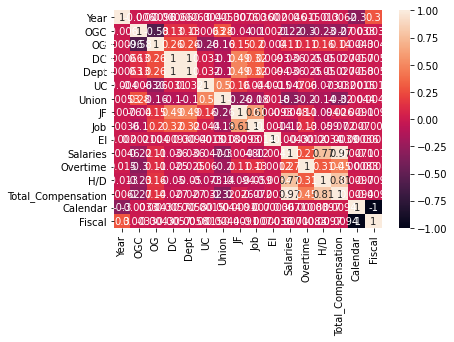

In [ ]:
sns.heatmap(f_train_data.corr(),annot=True)

In [ ]:
# import seaborn as sns
# #Using Pearson Correlation
# plt.figure(figsize=(15,15))
# cor = f_train_data.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [ ]:
n_train_data = f_train_data.drop_duplicates()

In [ ]:
X = n_train_data.drop("Total_Compensation",axis=1)   #Feature Matrix
y = n_train_data["Total_Compensation"]

In [ ]:

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((200979, 15), (86134, 15))

In [ ]:
# import seaborn as sns
# #Using Pearson Correlation
# plt.figure(figsize=(20,20))
# cor = X_train.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

3

In [ ]:
corr_features

{'Dept', 'Fiscal', 'H/D'}

In [ ]:
x_train  = X_train.drop(corr_features,axis=1)
x_test = X_test.drop(corr_features,axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
cols_to_scale = ['Year','OGC','OG','DC','UC','Union','JF','Job','EI','Salaries','Overtime','Calendar']

In [ ]:
scaler = MinMaxScaler()
x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])

In [ ]:
x_test[cols_to_scale] = scaler.fit_transform(x_test[cols_to_scale])

In [ ]:
x_train.head()

,Year,OGC,OG,DC,UC,Union,JF,Job,EI,Salaries,Overtime,Calendar
149438,0.33,0.00,0.60,0.12,0.50,0.06,0.26,0.02,0.20,0.13,0.02,0.00
101266,0.00,0.67,0.28,0.10,0.80,1.00,0.18,0.08,0.02,0.17,0.00,1.00
88825,0.33,0.17,1.00,0.67,0.25,0.22,0.79,1.00,0.68,0.12,0.04,0.00
73073,0.67,0.33,0.29,0.38,0.80,1.00,0.52,0.28,0.17,0.03,0.00,0.00
171489,0.33,0.50,0.69,1.00,0.80,1.00,0.19,0.06,0.77,0.16,0.00,1.00


In [ ]:
x_test.head()

,Year,OGC,OG,DC,UC,Union,JF,Job,EI,Salaries,Overtime,Calendar
80410,0.67,0.17,1.00,0.67,0.01,0.07,0.57,0.09,0.20,0.27,0.15,0.00
105343,0.00,0.00,0.60,0.18,0.81,0.13,0.37,0.32,0.17,0.26,0.34,1.00
68421,1.00,0.17,1.00,0.11,0.35,0.10,0.31,0.06,0.36,0.35,0.06,0.00
237738,0.00,0.50,0.69,1.00,0.02,0.44,0.01,0.00,0.21,0.43,0.06,1.00
194949,1.00,0.00,0.60,0.36,0.92,0.24,0.64,0.33,0.42,0.33,0.08,0.00


In [ ]:
pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
from sklearn.utils import shuffle
import numpy as np

In [ ]:
# reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
# models, predictions = reg.fit(x_train, x_test, y_train, y_test)

# print(models)

In [ ]:
# # -----------------Decision Tree Regressor---------------------
# >>> from sklearn.tree import DecisionTreeRegressor

# >>> regressor = DecisionTreeRegressor(random_state=42)
# # >>> cross_val_score(regressor, X, y, cv=10)

# regressor.fit(x_train,y_train)
# pred = regressor.predict(x_test)
# print(pred[:10])
# from sklearn.metrics import mean_squared_error
# print('mse is: ', mean_squared_error(y_test, pred))
# from math import sqrt

# rms = sqrt(mean_squared_error(y_test, pred))
# print(rms)
# print('--------------------------------------------------------------------')
# # ----------------------------------------------------------

[202558. 265113. 210212. 332297. 214871. 243972. 155202. 221882. 131565.
 116837.]
mse is:  5749995587.3329115
75828.72534424478
--------------------------------------------------------------------


In [ ]:
# rmse in DecisionTreeRegressor
# rms

In [ ]:
# # -----------------RANDOM FOREST REGRESSOR---------------------------------------

# # >>> from sklearn.tree import RandomForestRegressor
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(random_state=42)
# regressor.fit(x_train,y_train)
# pred = regressor.predict(x_test)
# print(pred[:10])

# print('mse is: ', mean_squared_error(y_test, pred))


# rms = sqrt(mean_squared_error(y_test, pred))


# print(rms)
# print('------------------------------------------------------------------')


[211593.91 261679.09 234262.59 301700.87 225126.97 241233.64 160085.8
 208410.89 139107.03 112948.1 ]
mse is:  5498155650.061506
74149.54922358939
------------------------------------------------------------------


In [ ]:
# rms for  RandomForestRegressor


In [ ]:
# from sklearn.svm import SVR
# regressor = SVR(kernel = 'rbf')
# regressor.fit(x_train, y_train)

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor
# # ---------------------EXTRA TREES REGRESSOR----------------------
# reg = ExtraTreesRegressor(n_estimators=100, random_state=68).fit(x_train, y_train)
# pred = reg.predict(x_test)
# print(pred[:10])
# print('mse is: ', mean_squared_error(y_test, pred))

# # RMSE for extraTreesRegressor
# rms = sqrt(mean_squared_error(y_test, pred))
# print(rms)
# print('------------------------------------------------------------------------------')

[215844.07 259566.85 235236.9  294529.04 228299.88 237485.01 160451.04
 194291.2  137036.62 112524.56]
mse is:  5058131646.236996
71120.54306764675
------------------------------------------------------------------------------


In [ ]:
# # ---------------------------------------------------------AdaBoostRegressor------------------------------
# from sklearn.ensemble import AdaBoostRegressor
# regr = AdaBoostRegressor(random_state=45, n_estimators=1000)
# regr.fit(x_train, y_train)
# pred = regr.predict(x_test)
# print(pred[:15])
# print('mse is: ', mean_squared_error(y_test, pred))
# # RMSE for adaboostRegressor
# rms = sqrt(mean_squared_error(y_test, pred))
# print(rms)

# print('----------------------------------------------------------------------------------------------')

In [ ]:
# # ----------------------------------------------------HIST GRADIENT BOOSTING REGRESSOR------------------------------
# from sklearn.ensemble import HistGradientBoostingRegressor
# regressor = HistGradientBoostingRegressor().fit(x_train, y_train)
# pred = regressor.predict(x_test)
# print(pred[:10])
# print('mse is: ', mean_squared_error(y_test, pred))
# # RMSE for HistGradientBoostingRegressor
# rms = sqrt(mean_squared_error(y_test, pred))
# print(rms)
# print('--------------------------------------------------------------------')

[212181.74776492 265874.11460678 233333.57382738 318226.02604597
 226754.69719108 236040.84507963 160328.60013148 205785.97290778
 128766.43610945 113823.67721477]
mse is:  5216466703.110994
72225.11130563244
--------------------------------------------------------------------


In [ ]:
# from sklearn import linear_model
# clf = linear_model.PoissonRegressor()

In [ ]:

# # -------------------------------LightBgm-----------------------------------
# import lightgbm as ltb
# regressor = ltb.LGBMRegressor()
# regressor.fit(x_train, y_train)
# pred = regressor.predict(x_test)
# print(pred[:10])
# print('mse is: ', mean_squared_error(y_test, pred))
# # RMS for LGBM Regressor
# rms = sqrt(mean_squared_error(y_test, pred))
# print(rms)
# print('------------------------------------------------------------------------')

[212872.06915856 259599.52890121 237591.13010187 323652.90279048
 227097.67262429 231907.1235053  162826.11268876 207815.25128919
 127826.39486699 112052.02468466]
mse is:  5203792362.378866
72137.31601867972
------------------------------------------------------------------------


In [ ]:
# # ----------------------------------------KNeighborsRegressor----------------------------------------
# from sklearn.neighbors import KNeighborsRegressor
# regressor = KNeighborsRegressor(n_neighbors=2)
# regressor.fit(x_train, y_train)
# pred = regressor.predict(x_test)
# print(pred[:10])
# print('mse is: ', mean_squared_error(y_test, pred))
# # RMS for K neigrest neighbour
# rms = sqrt(mean_squared_error(y_test, pred))
# print(rms)
# print('--------------------------------------------------------------------')

[197199.  261008.  244778.  225835.5 191950.  211734.  103680.  142365.
 139211.  103460.5]
mse is:  2339430923.319903
48367.664025874794
--------------------------------------------------------------------


In [ ]:
#  from sklearn.neural_network import MLPRegressor


In [ ]:
# error
# regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [ ]:
# from sklearn.linear_model import HuberRegressor
# regressor = HuberRegressor().fit(x_train, y_train)
# pred = regressor.predict(x_test)
# print(pred[:10])
# print('mse is: ', mean_squared_error(y_test, pred))
# # RMS for HuberRegressor
# rms = sqrt(mean_squared_error(y_test, pred))
# print(rms)

# print('------------------------------------------')

[219451.45004334 271644.00756821 253164.06583467 319943.30635578
 245019.76707125 243683.84820782 158760.07910419 207036.3410184
 130592.04179495 104301.43496605]
mse is:  5396724732.700342
73462.40353201318
------------------------------------------


In [ ]:
test_data = pd.read_csv('/content/test_set.csv')

In [ ]:
test_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT
0,2016,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,790,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Management Assistant,6161,74526,0,13068.80,Fiscal
1,2013,3,Human Welfare & Neighborhood Development,DSS,Human Services,1,Miscellaneous Unrepresented Employees,Public Service Aide,Public Svc Aide-Public Works,17890,7219,0,3328.05,Calendar
2,2016,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Sub-Professional Engineering,"Stdntdsgntrain1, Arch/Eng/Plng",15092,4616,0,1147.26,Fiscal
3,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Eligibility Worker,5144,6345,0,1433.60,Calendar
4,2015,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Trans And Dist Line Worker,40128,105851,153,12242.44,Calendar


In [ ]:
test_data.isnull().sum()

Year        0
OGC         0
OG          0
DC          0
Dept        0
UC          0
Union       7
JF          7
Job         0
EI          0
Salaries    0
Overtime    0
H/D         0
YT          0
dtype: int64

In [ ]:
test_data['Union'].fillna(test_data['Union'].mode()[0], inplace=True)

In [ ]:
test_data.isnull().sum()

Year        0
OGC         0
OG          0
DC          0
Dept        0
UC          0
Union       0
JF          7
Job         0
EI          0
Salaries    0
Overtime    0
H/D         0
YT          0
dtype: int64

In [ ]:
test_data['JF'].fillna(test_data['JF'].mode()[0], inplace=True)

In [ ]:
test_data.OG.value_counts().to_dict()
df_frequency_map = test_data.OG.value_counts().to_dict()
test_data.OG = test_data.OG.map(df_frequency_map)


In [ ]:
test_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT
0,2016,2,15314,AIR,Airport Commission,790,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Management Assistant,6161,74526,0,13068.80,Fiscal
1,2013,3,4420,DSS,Human Services,1,Miscellaneous Unrepresented Employees,Public Service Aide,Public Svc Aide-Public Works,17890,7219,0,3328.05,Calendar
2,2016,2,15314,PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Sub-Professional Engineering,"Stdntdsgntrain1, Arch/Eng/Plng",15092,4616,0,1147.26,Fiscal
3,2015,3,4420,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Eligibility Worker,5144,6345,0,1433.60,Calendar
4,2015,2,15314,HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Trans And Dist Line Worker,40128,105851,153,12242.44,Calendar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47855,2015,4,10414,DPH,Public Health,21,"Prof & Tech Engineers - Miscellaneous, Local 21","Budget, Admn & Stats Analysis",Senior Administrative Analyst,23825,91767,0,11176.32,Calendar
47856,2013,2,15314,AIR,Airport Commission,790,"SEIU - Miscellaneous, Local 1021",Housekeeping & Laundry,Custodian,16397,44603,0,10471.44,Calendar
47857,2015,5,4286,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",Housekeeping & Laundry,Custodian,37834,49274,0,11019.75,Fiscal
47858,2013,2,15314,MTA,Municipal Transportation Agency,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Legal & Court,Parking Hearing Examiner,49141,69972,0,9699.15,Calendar


In [ ]:
test_data.DC.value_counts().to_dict()
df_frequency_map = test_data.DC.value_counts().to_dict()
test_data.DC = test_data.DC.map(df_frequency_map)


In [ ]:
test_data.Dept.value_counts().to_dict()
df_frequency_map = test_data.Dept.value_counts().to_dict()
test_data.Dept = test_data.Dept.map(df_frequency_map)


test_data.Union.value_counts().to_dict()
df_frequency_map = test_data.Union.value_counts().to_dict()
test_data.Union = test_data.Union.map(df_frequency_map)


test_data.JF.value_counts().to_dict()
df_frequency_map = test_data.JF.value_counts().to_dict()
test_data.JF = test_data.JF.map(df_frequency_map)


In [ ]:

test_data.Job.value_counts().to_dict()
df_frequency_map = test_data.Job.value_counts().to_dict()
test_data.Job = test_data.Job.map(df_frequency_map)


In [ ]:
test_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT
0,2016,2,15314,2364,2369,790,13473,1283,144,6161,74526,0,13068.80,Fiscal
1,2013,3,4420,3982,3985,1,1159,2456,1078,17890,7219,0,3328.05,Calendar
2,2016,2,15314,1095,1093,21,6042,675,243,15092,4616,0,1147.26,Fiscal
3,2015,3,4420,3982,3985,535,2136,2456,352,5144,6345,0,1433.60,Calendar
4,2015,2,15314,448,449,6,999,2872,11,40128,105851,153,12242.44,Calendar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47855,2015,4,10414,10415,10417,21,6042,1283,301,23825,91767,0,11176.32,Calendar
47856,2013,2,15314,2364,2369,790,13473,1628,1013,16397,44603,0,10471.44,Calendar
47857,2015,5,4286,2634,2637,790,13473,1628,1013,37834,49274,0,11019.75,Fiscal
47858,2013,2,15314,7001,6996,21,6042,1061,14,49141,69972,0,9699.15,Calendar


In [ ]:
one_hot  =  pd.get_dummies(test_data.YT)
df = pd.concat([test_data, one_hot], axis=1)
f_test_data = df.drop('YT',axis=1)
# {'Dept', 'Fiscal', 'H/D'}(drop)


In [ ]:
d_test_data = f_test_data.drop(['Dept','Fiscal','H/D'],axis=1)

In [ ]:
d_test_data

,Year,OGC,OG,DC,UC,Union,JF,Job,EI,Salaries,Overtime,Calendar
0,2016,2,15314,2364,790,13473,1283,144,6161,74526,0,0
1,2013,3,4420,3982,1,1159,2456,1078,17890,7219,0,1
2,2016,2,15314,1095,21,6042,675,243,15092,4616,0,0
3,2015,3,4420,3982,535,2136,2456,352,5144,6345,0,1
4,2015,2,15314,448,6,999,2872,11,40128,105851,153,1
...,...,...,...,...,...,...,...,...,...,...,...,...
47855,2015,4,10414,10415,21,6042,1283,301,23825,91767,0,1
47856,2013,2,15314,2364,790,13473,1628,1013,16397,44603,0,1
47857,2015,5,4286,2634,790,13473,1628,1013,37834,49274,0,0
47858,2013,2,15314,7001,21,6042,1061,14,49141,69972,0,1


In [ ]:

cols_to_scale = ['Year','OGC','OG','DC','UC','Union','JF','Job','EI','Salaries','Overtime','Calendar']

scaler = MinMaxScaler()
d_test_data[cols_to_scale] = scaler.fit_transform(d_test_data[cols_to_scale])


In [ ]:
d_test_data.isnull().sum()

Year        0
OGC         0
OG          0
DC          0
UC          0
Union       0
JF          0
Job         0
EI          0
Salaries    0
Overtime    0
Calendar    0
dtype: int64

In [ ]:
target = regressor.predict(d_test_data)

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ['Compensation']

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv')
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>